不同于quantopian的IDE，我们直接使用`zipline`研究环境在Notebook中完成回测分析。

运行以下代码

In [1]:
# 回测结果默认存放路径"~/.backtest/"

In [2]:
from zipline.research import get_backtest

In [3]:
bt = get_backtest() # 这将获取最新的回测结果

In [4]:
# 查看回测结果数据
bt.tail()

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2018-06-05 07:00:00+00:00,0.438276,-0.607728,-0.989541,0.100898,0.142869,1.316230,-32.88,-190.001,3922909.03,3922909.03,...,0.0,0.0,0,-2.378363,-157.121,3916790.28,3916790.28,249,"[{'amount': 33, 'dt': 2018-06-05 07:00:00+00:0...",0.0
2018-06-06 07:00:00+00:00,0.437749,-0.615929,-1.004094,0.098618,0.142604,1.317995,8438.65,8248.649,3832457.90,3832457.90,...,0.0,0.0,0,-2.428603,-190.001,3922909.03,3922909.03,250,"[{'amount': 291834, 'dt': 2018-06-06 07:00:00+...",0.0
2018-06-07 07:00:00+00:00,0.437043,-0.612579,-0.988993,0.096803,0.142333,1.316469,134465.07,142713.719,3731496.21,3731496.21,...,0.0,0.0,0,-2.399142,8248.649,3832457.90,3832457.90,251,"[{'amount': -291867, 'dt': 2018-06-07 07:00:00...",0.0
2018-06-08 07:00:00+00:00,0.436172,-0.614256,-0.970692,0.082089,0.142721,1.304756,-142308.28,405.439,3857032.84,3857032.84,...,0.0,0.0,0,-2.406391,142713.719,3731496.21,3731496.21,252,"[{'amount': 5818, 'dt': 2018-06-08 07:00:00+00...",0.0
2018-06-11 07:00:00+00:00,0.435722,-0.622925,-0.989387,0.082193,0.142437,1.304993,54715.47,55120.909,3715628.04,3715628.04,...,0.0,0.0,0,-2.459876,405.439,3857032.84,3857032.84,253,"[{'amount': -157741, 'dt': 2018-06-11 07:00:00...",0.0


最大回撤,净回撤百分比,波峰日期,波谷日期,回本日期,回本天数
0,62.29,2017-10-25,2018-06-11,NaT,NaN
1,0.00,2017-06-02,2017-06-02,2017-06-02,1
2,0.00,2017-06-02,2017-06-02,2017-06-02,1
3,0.00,2017-06-02,2017-06-02,2017-06-02,1
4,0.00,2017-06-02,2017-06-02,2017-06-02,1


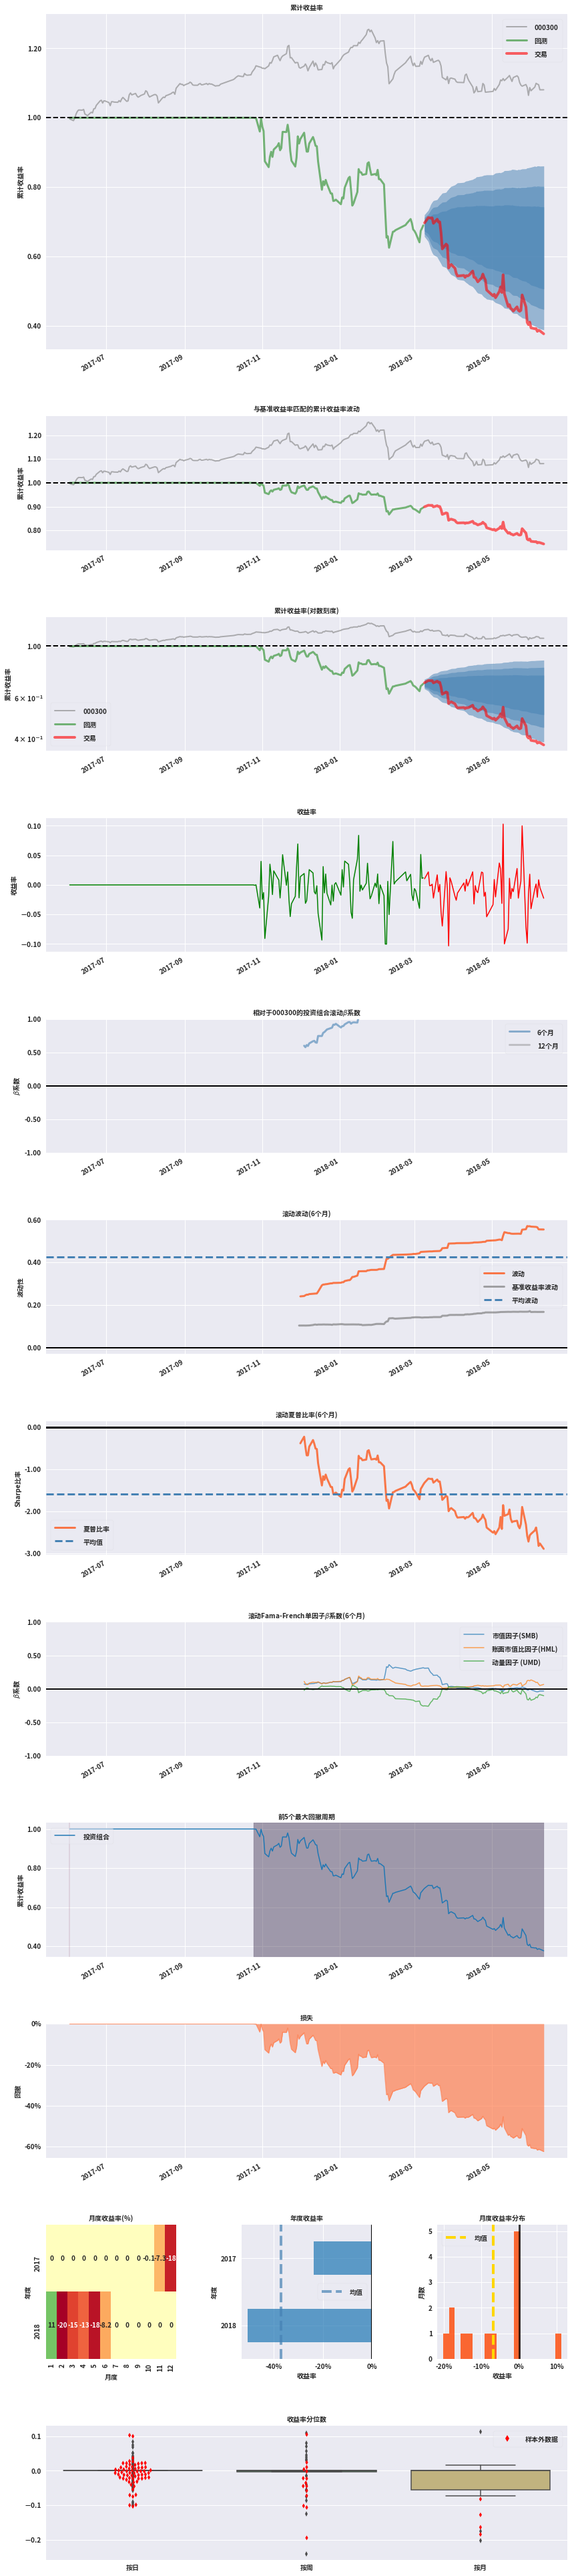

前十位多头头寸,max
sid,
000537,106.01%
000002,104.44%
000410,103.92%
000528,103.54%
000532,103.46%
000411,103.06%
000488,102.60%
000014,102.57%
000418,101.20%


前十位空头头寸,max
sid,


前十位总头寸,max
sid,
000537,106.01%
000002,104.44%
000410,103.92%
000528,103.54%
000532,103.46%
000411,103.06%
000488,102.60%
000014,102.57%
000418,101.20%


历史总头寸,max
sid,
000537,106.01%
000002,104.44%
000410,103.92%
000528,103.54%
000532,103.46%
000411,103.06%
000488,102.60%
000014,102.57%
000418,101.20%


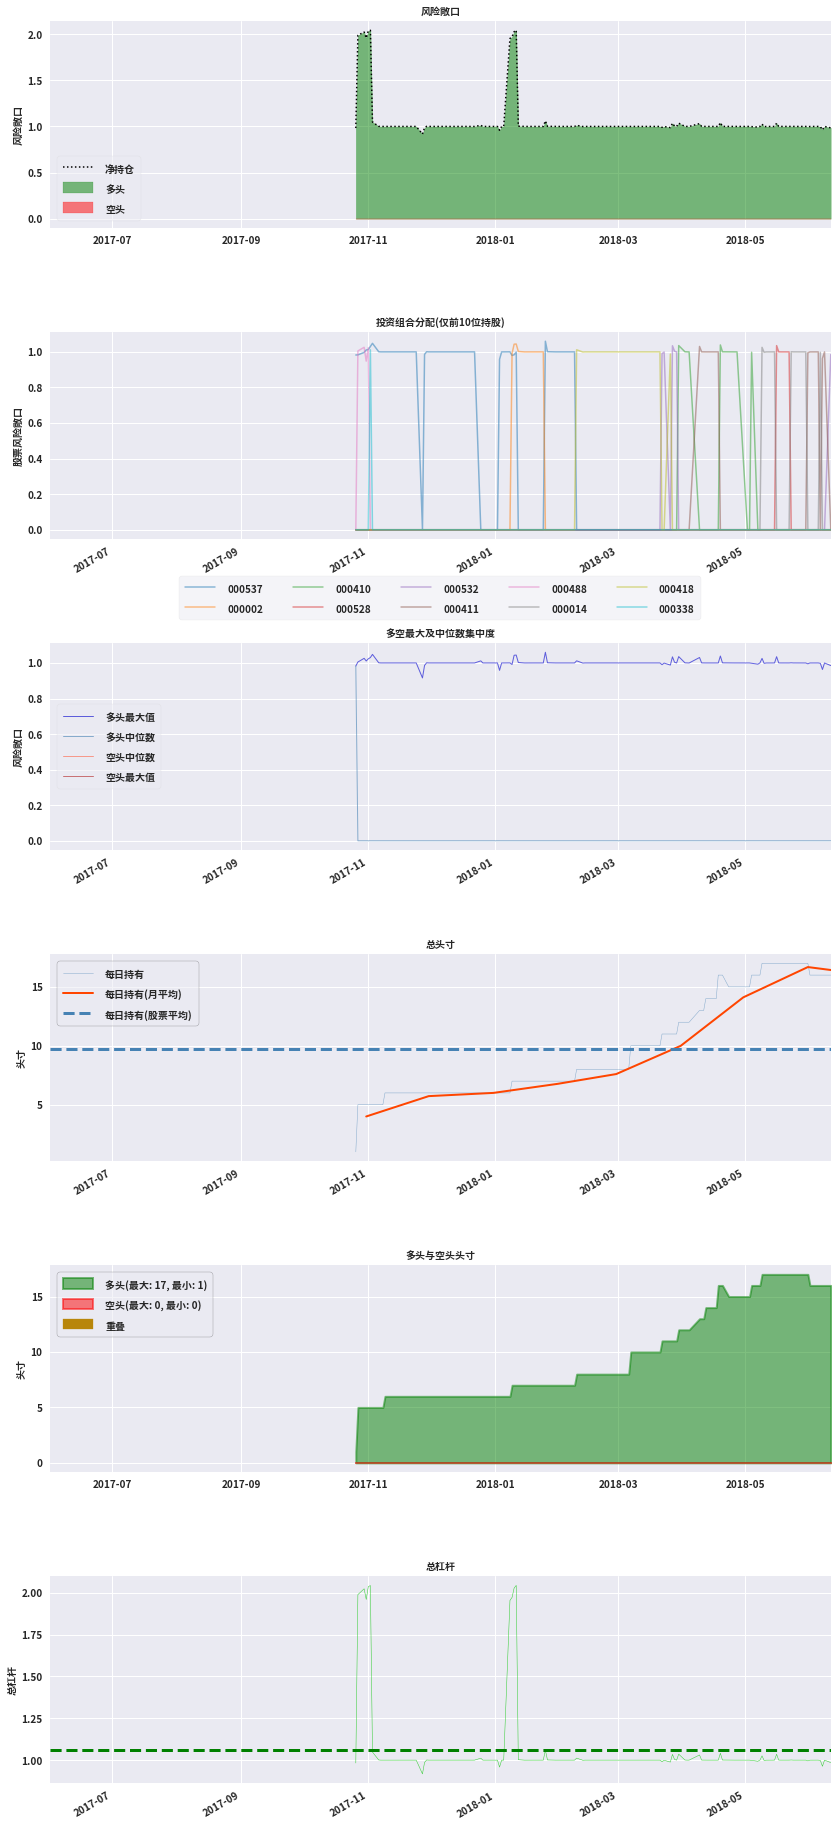

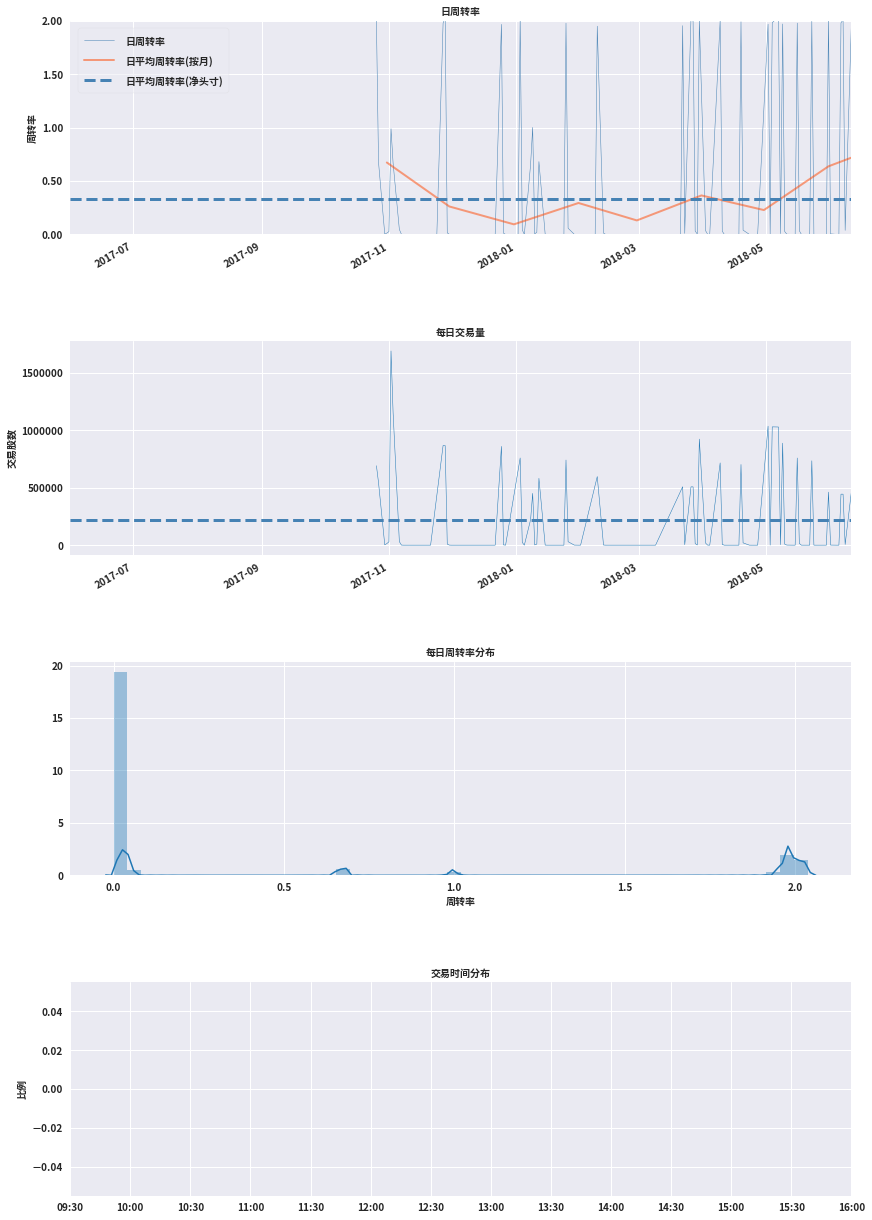

概要统计,所有交易,空头交易,多头交易
完成交易总数,121.00,1.00,120.00
盈利比率,0.28,0.00,0.28
盈利次数,34.00,0.00,34.00
亏损次数,85.00,0.00,85.00
持平次数,2.00,1.00,1.00


盈亏统计,所有交易,空头交易,多头交易
总利润,¥-6014779.76,¥0.00,¥-6014779.76
毛利润,¥2038277.43,¥0.00,¥2038277.43
毛亏损,¥-8053057.19,¥0.00,¥-8053057.19
盈亏因子,¥0.25,¥nan,¥0.25
平均交易净利润,¥-49708.92,¥0.00,¥-50123.16
盈利交易平均值,¥59949.34,¥nan,¥59949.34
亏损交易平均值,¥-94741.85,¥nan,¥-94741.85
盈亏均值因子,¥0.63,¥nan,¥0.63
交易最大盈利,¥924319.69,¥0.00,¥924319.69
交易最大亏损,¥-2244288.40,¥0.00,¥-2244288.40


周期统计,所有交易,空头交易,多头交易
平均周期,23 days 19:21:49.214876,06:59:59,24 days 00:04:00.133333
中位数周期,8 days 00:00:00,06:59:59,8 days 00:00:00
最长周期,226 days 17:00:01,06:59:59,226 days 17:00:01
最短周期,0 days 06:59:59,06:59:59,1 days 00:00:00


收益率统计,所有交易,空头交易,多头交易
所有已完成交易平均收益率,-0.84%,0.00%,-0.84%
盈利交易平均收益率,0.80%,nan%,0.80%
亏损交易平均收益率,-1.51%,nan%,-1.51%
所有已完成交易中位数收益率,-0.00%,0.00%,-0.00%
盈利交易中位数收益率,0.00%,nan%,0.00%
亏损交易中位数收益率,-0.00%,nan%,-0.00%
最大盈利率,10.60%,0.00%,10.60%
最大亏损率,-34.09%,0.00%,-34.09%


个股统计,000002,000014,000016,000063,000066,000151,000338,000410,000411,000418,000425,000426,000488,000517,000519,000528,000532,000537
所有已完成交易平均收益率,1.05%,-1.83%,-0.00%,0.37%,-0.13%,-0.00%,-0.82%,-0.78%,-1.41%,1.14%,-0.00%,-0.00%,-0.91%,-0.00%,-0.00%,-0.19%,-1.81%,-3.30%
盈利交易平均收益率,2.12%,0.31%,0.00%,1.30%,0.00%,0.00%,0.00%,0.98%,nan%,1.56%,nan%,nan%,nan%,nan%,nan%,0.00%,nan%,0.00%
亏损交易平均收益率,-0.02%,-3.54%,-0.00%,-0.24%,-0.14%,-0.00%,-4.12%,-1.48%,-1.41%,-0.55%,-0.00%,-0.00%,-0.91%,-0.00%,-0.00%,-0.25%,-2.07%,-4.32%
所有已完成交易中位数收益率,-0.00%,-0.00%,-0.00%,-0.00%,-0.00%,-0.00%,0.00%,-0.00%,-0.02%,0.00%,-0.00%,-0.00%,-0.01%,-0.00%,-0.00%,-0.00%,-0.02%,-0.00%
盈利交易中位数收益率,0.00%,0.13%,0.00%,1.05%,0.00%,0.00%,0.00%,0.00%,nan%,0.04%,nan%,nan%,nan%,nan%,nan%,0.00%,nan%,0.00%
亏损交易中位数收益率,-0.00%,-0.00%,-0.00%,-0.00%,-0.00%,-0.00%,-4.12%,-0.00%,-0.02%,-0.55%,-0.00%,-0.00%,-0.01%,-0.00%,-0.00%,-0.00%,-0.04%,-0.11%
最大盈利率,10.60%,0.99%,0.00%,3.09%,0.00%,0.00%,0.00%,3.92%,-0.00%,6.14%,-0.00%,-0.00%,-0.00%,-0.00%,0.00%,0.00%,0.00%,0.00%
最大亏损率,-0.08%,-10.06%,-0.00%,-1.46%,-0.91%,-0.00%,-4.12%,-9.11%,-6.69%,-0.55%,-0.00%,-0.00%,-4.47%,-0.00%,-0.00%,-1.71%,-8.99%,-34.09%


个股盈利能力(合计PnL/PnL),
symbol,
000537,67.33%
000532,14.28%
000014,11.98%
000410,9.64%
000411,7.83%
000488,7.38%
000338,6.59%
000528,1.28%
000066,1.04%


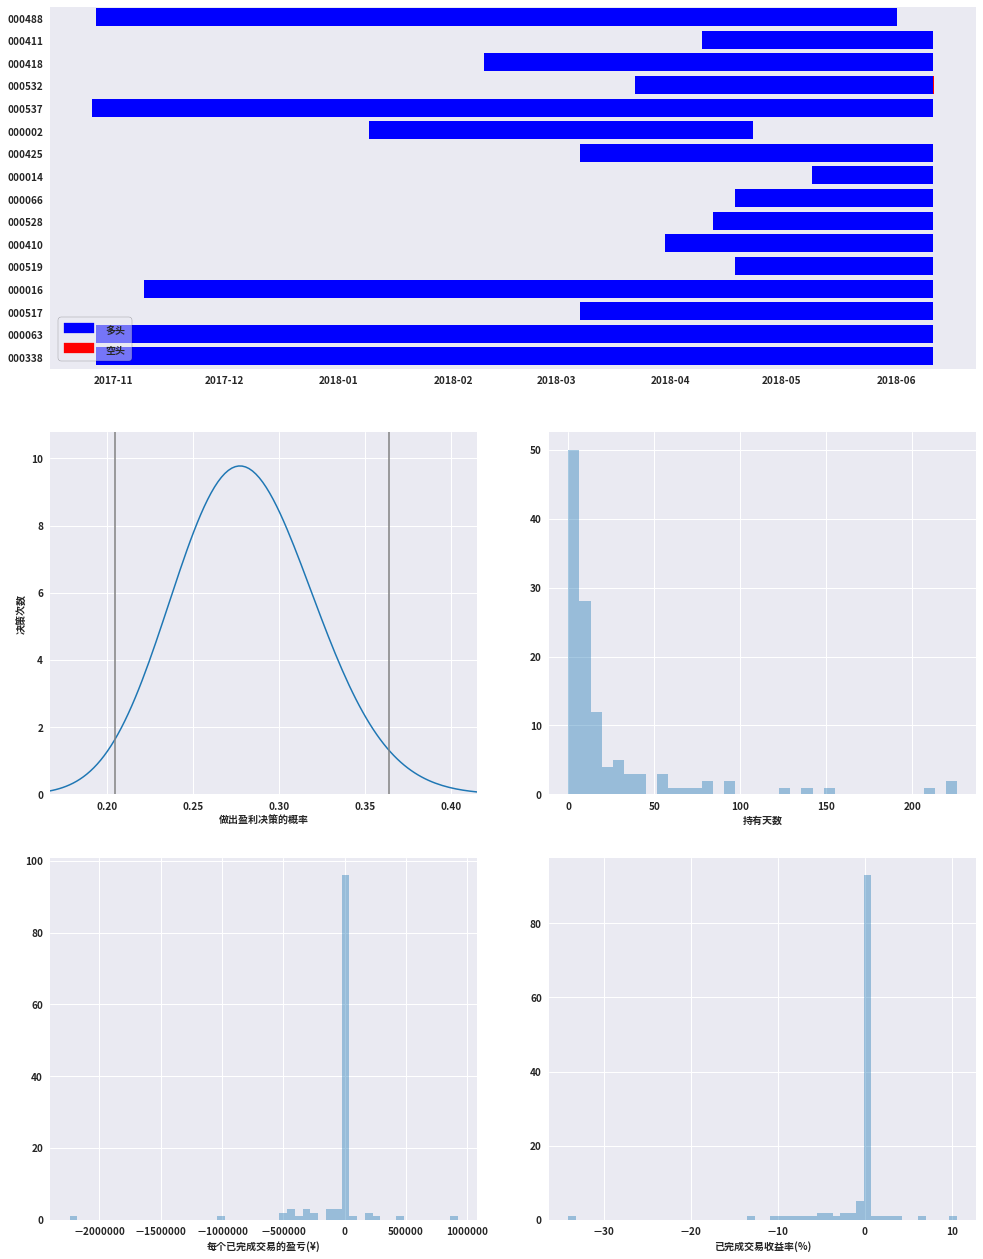

In [5]:
# 创建底稿
bt.create_full_tear_sheet()

当前`pyfolio`问题点：
+ 累计收益率
+ 有关共同风险与特质风险的计算

执行这个单元格（`Shift + Enter`）将回测生成的数据加载到研究笔记本中，并用它来创建`Pyfolio`底稿表。`Pyfolio`专用于投资组合和风险分析的开源工具。它提供了许多可视化工具，旨在帮助您更好地理解算法的行为和整个期间的风险敞口。

例如，下图显示了投资组合相对整个市场滚动风险敞口。想要构建多空等权交易算法的原因之一是保持与市场的低相关性，所以希望这个图在整个回测期间始终保持在0附近。

业绩归因是另一个有趣的部分。下图使用了风险模型来说明有多少收益可以归因于策略，其中有多少来自共同风险因子。

In [6]:
# 补充单独的图

可以从上图观察到，投资组合的大部分总收益都来自特定收益。 这表明算法的性能不是来自市场共同风险因子，这是一件好事。
祝贺您完成Quantitian入门教程！ 现在您已熟悉该平台的API，请尝试研究并制定自己的策略并将其提交给[竞赛](https://www.quantopian.com/contest)。
在您制定新策略时，请遵循我们的投资标准，以提高[从Quantopian获得资本分配](https://www.quantopian.com/allocation)的机会。如果您需要创意，请查看[讲座系列](https://www.quantopian.com/lectures)以了解更多关于量化金融的信息，或查看其他成员在[社区](https://www.quantopian.com/posts/tag/futures)中分享的想法。